In [82]:
import numpy as np,pandas as pd
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
plt.rcParams['axes.facecolor']='white'
plt.rcParams['figure.facecolor']='white'
plt.rcParams['figure.edgecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.edgecolor']='white'
plt.rcParams['axes.labelsize']=14
plt.rcParams['xtick.labelsize']=14
plt.rcParams['ytick.labelsize']=14
plt.rcParams['axes.titlesize']=14
plt.rcParams['legend.framealpha']=1
plt.rcParams['legend.fontsize']=14
plt.rcParams['axes.xmargin']=0.2
plt.rcParams['axes.ymargin']=0.2
plt.rcParams['axes.autolimit_mode']='round_numbers'
plt.rcParams['font.sans-serif']='Tahoma'

def pltcolor(n):
    
    return plt.rcParams['axes.prop_cycle'].by_key()['color'][n]

In [83]:
def get_all_data_ue_edge():
    
    report_path = "reports"

    overall_df = pd.read_csv(f"{report_path}/server.csv")
    overall_df.insert(0,"client",-1) # -1 indicates the server
    overall_df = overall_df[overall_df["round"]<51]
    max_round = overall_df["round"].max()
    tmp = []
    for i in range(max_round+1):
        tmp += [i]*4

    for i in range(5):
       
        df = pd.read_csv(f"{report_path}/report_{i}.csv")
        df.insert(0,"client",i)
        overall_df = overall_df.append(df) 
            
                
    return overall_df.reset_index(drop=True)


In [84]:
overall_df = get_all_data_ue_edge()
overall_df = overall_df[overall_df["round"]<51]
overall_df

,client,round,operation,phase,t,p,train_loss,train_acc
0,-1,0,evaluate,start,1648548065108263436,881140067,NaN,NaN
1,-1,0,evaluate,end,1648548067493695595,10389934925,461.060874,0.1042
2,-1,1,aggregation,start,1648548286731791793,10496447205,NaN,NaN
3,-1,1,aggregation,end,1648548286739836482,10503810424,NaN,NaN
4,-1,1,evaluate,start,1648548286741486946,10505460453,NaN,NaN
...,...,...,...,...,...,...,...,...
2873,4,50,training,end,1648557003183186006,13969239295886,NaN,NaN
2874,4,50,evaluation,start,1648557003183374520,13969239456725,NaN,NaN
2875,4,50,evaluation,end,1648557031454589455,14030387556800,228.334271,0.6727
2876,4,50,send_fit_ins,start,1648557031455485508,14030400584118,NaN,NaN


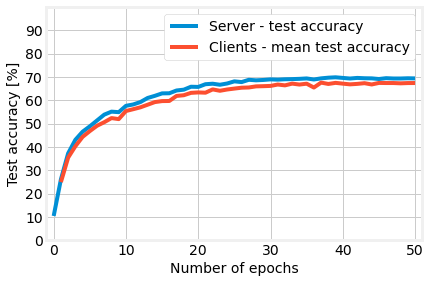

In [85]:
server = overall_df[overall_df["client"]==-1]
server_test_acc = server.train_acc.dropna().reset_index(drop=True)
plt.plot(server_test_acc, label="Server - test accuracy")


clients_df = overall_df[overall_df["client"]!=-1]
clients_df_acc = clients_df.dropna()

plt.plot(clients_df_acc.groupby(by="round").mean().train_acc, label="Clients - mean test accuracy")

plt.ylabel("Test accuracy [%]")
plt.xlabel("Number of epochs")
plt.ylim(0)
plt.xlim(-1,51)
plt.yticks([x/10 for x in range(10)], [x*10 for x in range(10)])
plt.legend()
plt.savefig("figures/test_accuracy_mean.png", bbox_inches = "tight")
plt.show()

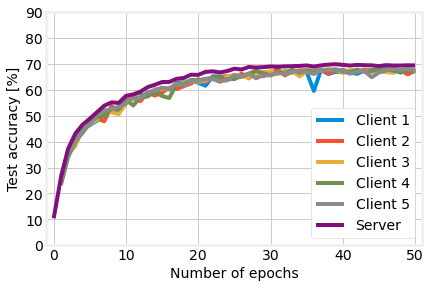

In [86]:
for i in range(5):
    clients_df = overall_df[overall_df["client"]==i]
    clients_df_acc = clients_df.dropna().reset_index(drop=True)
    plt.plot(range(1,51),clients_df_acc.train_acc, label=f"Client {i+1}")

plt.ylabel("Test accuracy [%]")
plt.xlabel("Number of epochs")
plt.ylim(0)
plt.xlim(-1,51)
plt.yticks([x/10 for x in range(10)], [x*10 for x in range(10)])

plt.plot(server_test_acc, label="Server")
plt.legend()
plt.savefig("figures/test_accuracy_all.png", bbox_inches = "tight")

plt.show()

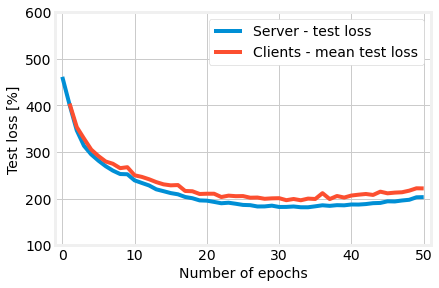

In [87]:
server = overall_df[overall_df["client"]==-1]
server_test_loss = server.train_loss.dropna().reset_index(drop=True)
plt.plot(server_test_loss, label="Server - test loss")


clients_df = overall_df[overall_df["client"]!=-1]
clients_df_loss = clients_df.dropna()

plt.plot(clients_df_loss.groupby(by="round").mean().train_loss, label="Clients - mean test loss")
plt.ylabel("Test loss [%]")
plt.xlabel("Number of epochs")
plt.xlim(-1,51)
plt.legend()
plt.savefig("figures/loss.png", bbox_inches = "tight")
plt.show()

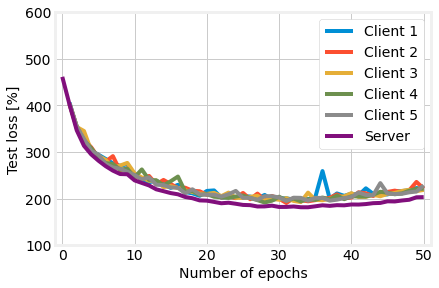

In [88]:
for i in range(5):
    clients_df = overall_df[overall_df["client"]==i]
    clients_df_loss = clients_df.dropna().reset_index(drop=True)
    plt.plot(range(1,51),clients_df_loss.train_loss, label=f"Client {i+1}")

plt.ylabel("Test loss [%]")
plt.xlabel("Number of epochs")
plt.xlim(-1,51)
plt.plot(server_test_loss, label="Server")
plt.legend()
plt.savefig("figures/test_loss_all.png", bbox_inches = "tight")

plt.show()